In [19]:
 print("Machine Learning for Retirement Fund Analysis")

intro = """
The aim is to use machine learning to anticipate how employees will act when taking money from their retirement fund 
and predict the future growth of the locked fund while also analyzing the sentiment of employee responses.
"""
print(intro)
print()

Machine Learning for Retirement Fund Analysis

The aim is to use machine learning to anticipate how employees will act when taking money from their retirement fund 
and predict the future growth of the locked fund while also analyzing the sentiment of employee responses.




In [25]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
file_path = r'C:\Users\Mlondi\OneDrive - Mangosuthu University of Technology\personal\personal\This pc\Desktop\TP2 Final Exam\test.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

print()

   Employee ID  Age Gender  Years at Company    Job Role  Monthly Income  \
0        52685   36   Male                13  Healthcare            8029   
1        30585   35   Male                 7   Education            4563   
2        54656   50   Male                 7   Education            5583   
3        33442   58   Male                44       Media            5525   
4        15667   39   Male                24   Education            4604   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent             High            Average                     1   
1              Good             High            Average                     1   
2              Fair             High            Average                     3   
3              Fair        Very High               High                     0   
4              Good             High            Average                     0   

   ... Number of Dependents  Job Level Company Size Comp

In [26]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Display columns with missing values

print()

Series([], dtype: int64)



In [27]:
# Dropping rows with missing values
data_cleaned = data.dropna()

# Display the cleaned data
print(data_cleaned.isnull().sum())  # Check if there are still missing values

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


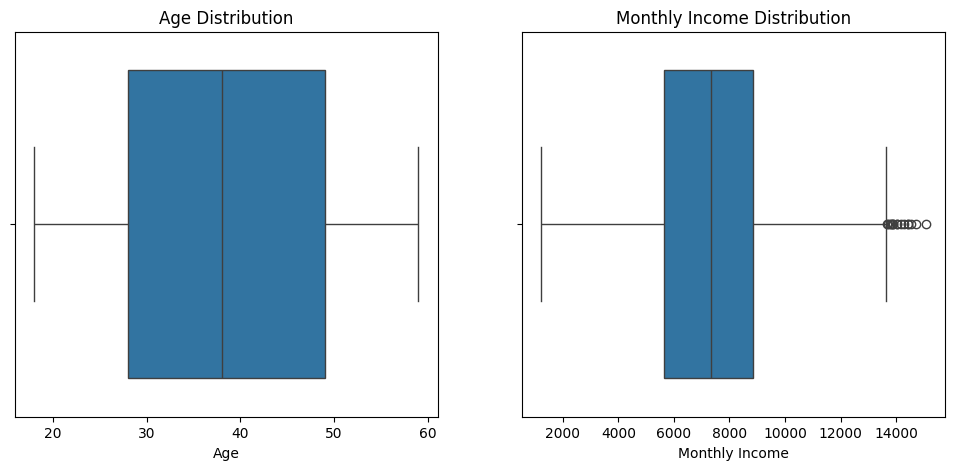

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers for the 'Age' and 'Monthly Income' columns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['Age'])
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Monthly Income'])
plt.title('Monthly Income Distribution')

plt.show()


In [39]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])  # Display columns with missing values

# Handle missing values (Option 1: Drop rows with missing values)
data_cleaned = data.dropna()  # Use this if you want to remove rows with any missing values
print("Cleaned data shape:", data_cleaned.shape)

# Optionally, you can display the first few rows of the cleaned data
print("\nFirst few rows of the cleaned data:")
print(data_cleaned.head())


Missing values in each column:
 Series([], dtype: int64)
Cleaned data shape: (14900, 24)

First few rows of the cleaned data:
   Employee ID  Age Gender  Years at Company    Job Role  Monthly Income  \
0        52685   36   Male                13  Healthcare            8029   
1        30585   35   Male                 7   Education            4563   
2        54656   50   Male                 7   Education            5583   
3        33442   58   Male                44       Media            5525   
4        15667   39   Male                24   Education            4604   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent             High            Average                     1   
1              Good             High            Average                     1   
2              Fair             High            Average                     3   
3              Fair        Very High               High                     0   
4           

In [40]:
# Check the data types of each column
print("Data types:\n", data_cleaned.dtypes)

# Generate descriptive statistics
print("\nDescriptive statistics:\n", data_cleaned.describe())


Data types:
 Employee ID                  int64
Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level                   object
Company Size                object
Company Tenure               int64
Remote Work                 object
Leadership Opportunities    object
Innovation Opportunities    object
Company Reputation          object
Employee Recognition        object
Attrition                   object
dtype: object

Descriptive statistics:
         Employee ID           Age  Years at Company  Monthly Income  \
count  14900.000000  14900.000000   

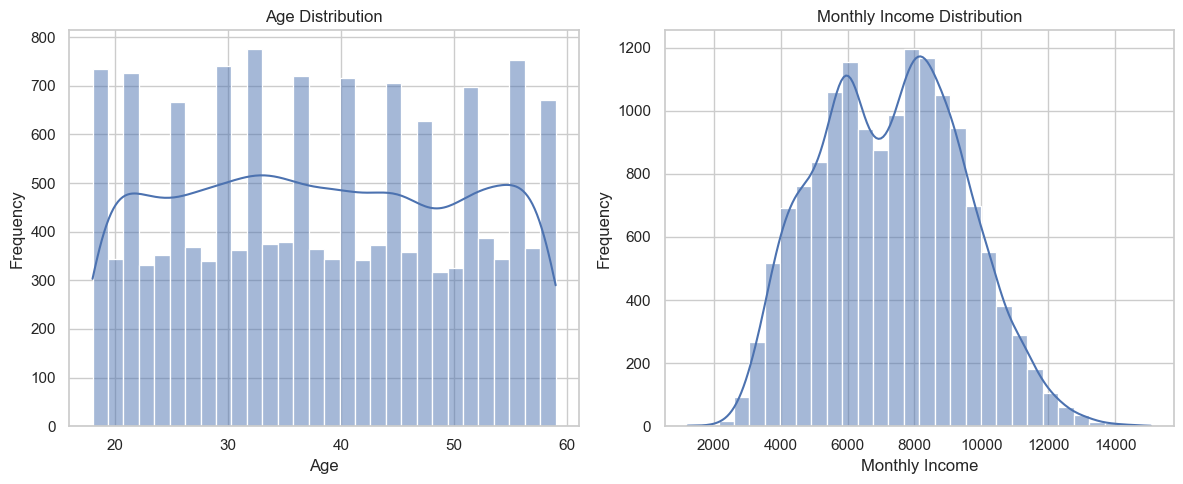

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Visualizing distributions of 'Age' and 'Monthly Income'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['Monthly Income'], bins=30, kde=True)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()

# Assuming 'Attrition' is the target variable (1 = Left, 0 = Stayed)
data_cleaned['Attrition'] = label_encoder.fit_transform(data_cleaned['Attrition'])

# Select features and target variable
features = data_cleaned.drop(columns=['Employee ID', 'Attrition'])  # Exclude Employee ID and target variable
target = data_cleaned['Attrition']

# Encode categorical features
features_encoded = pd.get_dummies(features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (11920, 41)
Testing set shape: (2980, 41)


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Assuming 'data_cleaned' is your cleaned DataFrame

# Encoding categorical variables
label_encoder = LabelEncoder()

# Encode categorical features
data_cleaned['Job Satisfaction'] = label_encoder.fit_transform(data_cleaned['Job Satisfaction'])
data_cleaned['Performance Rating'] = label_encoder.fit_transform(data_cleaned['Performance Rating'])
data_cleaned['Attrition'] = label_encoder.fit_transform(data_cleaned['Attrition'])  # Encode target variable if it's categorical

# Define the features and target variable
X = data_cleaned[['Age', 'Monthly Income', 'Years at Company', 'Job Satisfaction', 'Performance Rating']]
y = data_cleaned['Attrition']  # Assuming this is your target variable

# Now, perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=200)  # or use solver='saga'
model.fit(X_train_scaled, y_train)

# Now you can make predictions and evaluate the model


LogisticRegression(max_iter=200)

In [48]:
# Make predictions
y_pred = model.predict(X_test_scaled)


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.34      0.41      1391
           1       0.56      0.72      0.63      1589

    accuracy                           0.54      2980
   macro avg       0.54      0.53      0.52      2980
weighted avg       0.54      0.54      0.53      2980

Confusion Matrix:
 [[ 473  918]
 [ 443 1146]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [55]:
print("Implementing different models, including Decision Trees and Random Forests, to see how they compare to Logistic Regression")

Implementing different models, including Decision Trees and Random Forests, to see how they compare to Logistic Regression


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Fit the models and evaluate their performance
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))



In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
